In [131]:
#import section

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [133]:
df = pd.read_csv('Cust_Segmentation.csv')
df.head(2)


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0,NBA021,12.8


In [135]:
df.shape

(850, 10)

#### Data Cleansing

1) Remove columns that does not add any value to the clustering

In [137]:
X = df.drop(columns= ['Customer Id' , 'Address'])

In [139]:
X.head(5)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0,6.3
1,47,1,26,100,4.582,8.218,0,12.8
2,33,2,10,57,6.111,5.802,1,20.9
3,29,2,4,19,0.681,0.516,0,6.3
4,47,1,31,253,9.308,8.908,0,7.2


2) Check for null values

In [141]:
X.isna().sum()


Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [57]:
#Y = pd.isnull(df['Age'])
#missgin_data = df[Y]
#missgin_data

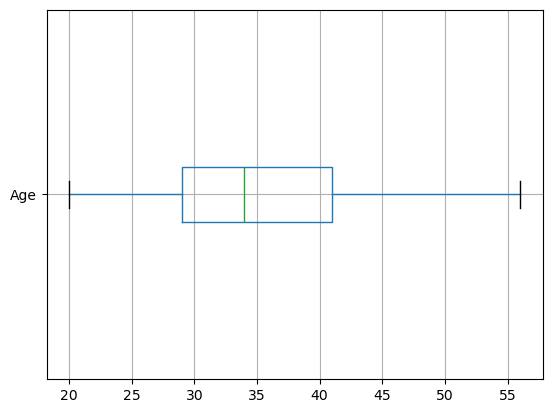

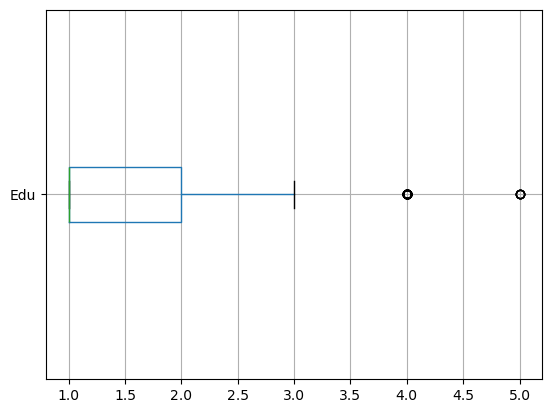

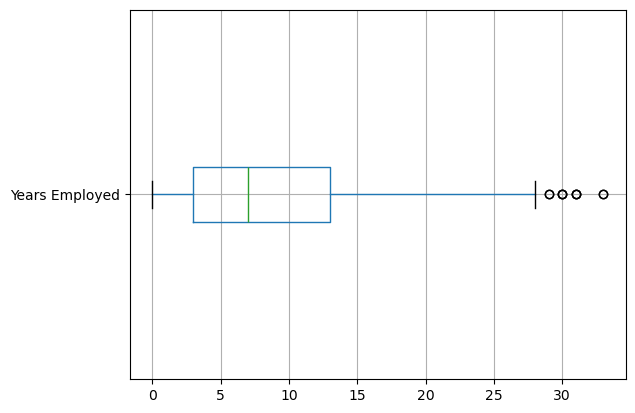

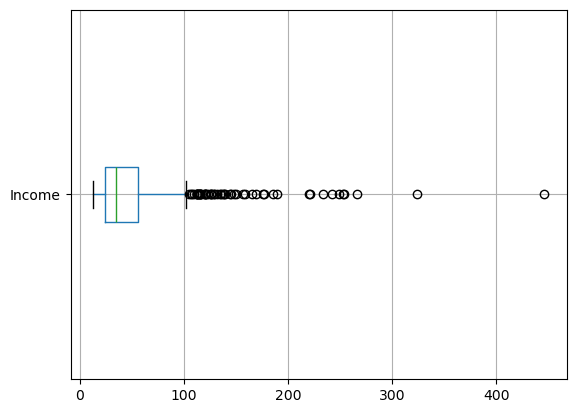

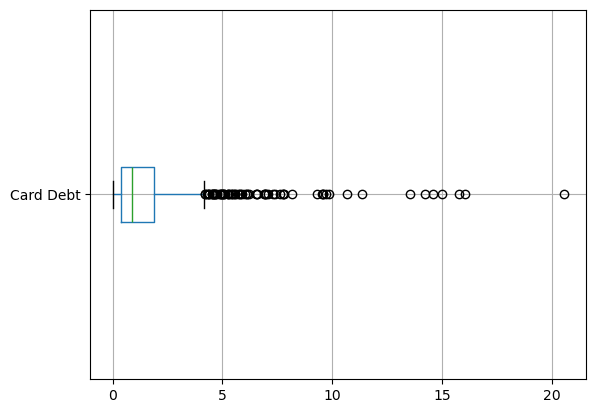

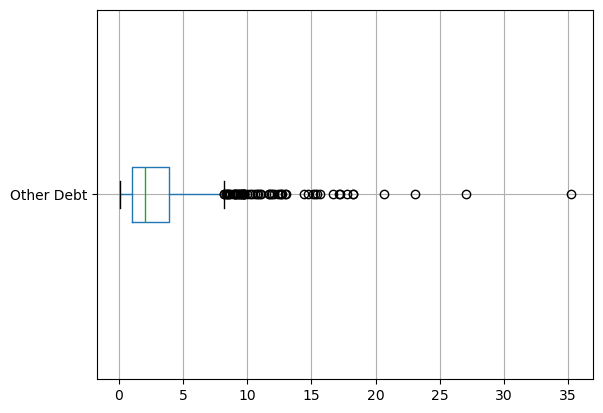

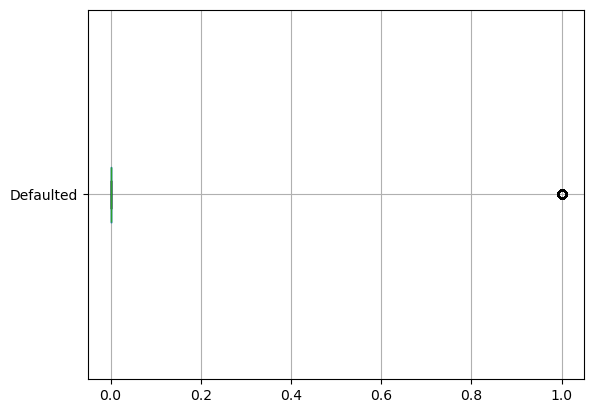

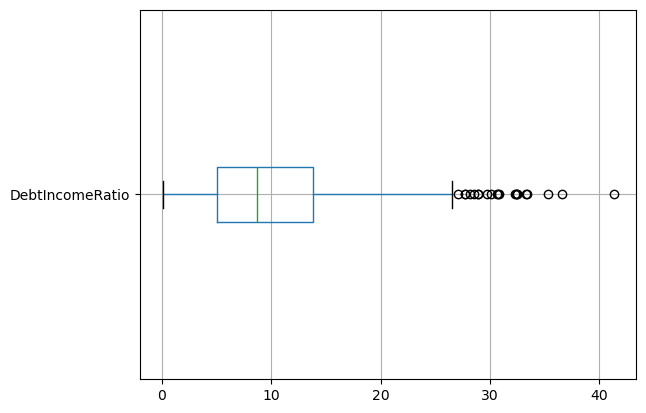

In [143]:
## Finding cloumns which are having  Outliers
 
for column in X:
    X.boxplot([column] , vert =False)
    plt.show()

In [161]:
#Remove outliers
def remove_outlier_rows(df_in) :
    df_out = df_in.copy()
    rows_to_drop = set()

    for col_name in df_in.columns :
        q1 = df_in[col_name].quantile(0.25)
        q3 = df_in[col_name].quantile(0.75)
        iqr = q3 - q1
        low_point  =  q1 - 1.5*iqr
        high_point =  q3 + 1.5*iqr
        outlier_rows = df_in[(df_in[col_name] < low_point) | (df_in[col_name] > high_point)].index
        rows_to_drop.update(outlier_rows)
          
    df_out = df_out.drop(rows_to_drop)
    return df_out

or_X = remove_outlier_rows(X)
#or_X
    
       

In [165]:

def remove_outlier_rows(df_in):
    df_out = df_in.copy()
    rows_to_drop = set()
    
    for col_name in df_in.columns:
        q1 = df_in[col_name].quantile(0.25)
        q3 = df_in[col_name].quantile(0.75)
    
        iqr = q3 - q1
        fence_low = q1 -1.5*iqr
        fence_high = q3 +1.5*iqr
        
        #print(col_name, q1,q3)
        
        #display(df_in[(df_in[col_name]<fence_low) | (df_in[col_name]>fence_high)])
        
        outlier_rows = df_in[(df_in[col_name]<fence_low) | (df_in[col_name]>fence_high)].index
        rows_to_drop.update(outlier_rows)
        
    df_out = df_out.drop(rows_to_drop)
    return df_out 
or_X = remove_outlier_rows(X)        
or_X.shape


(540, 8)

In [167]:
orginal_X = X.copy()
X = or_X.copy()

In [185]:
#Implement KMeans
#finding Cluster no's by elbow diagram
from sklearn.cluster import KMeans

res = []
for k in range(1,8) :
    clus = KMeans(n_clusters = k , random_state = 42)
    clus.fit(X)
    cl_labels = clus.predict(X)
    res.append(clus.inertia_) # Interia provides WCSS 


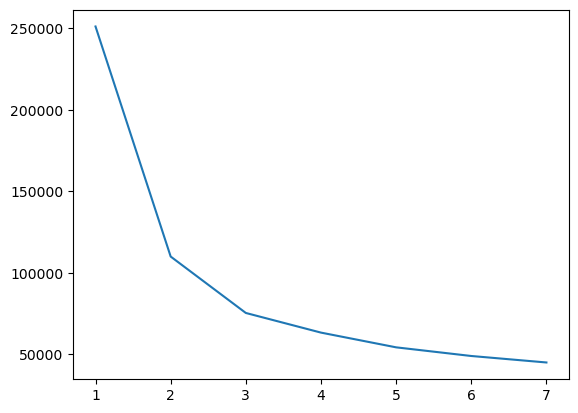

In [191]:

plt.plot(range(1,8),res)
plt.show()

In [199]:
k_cluster = KMeans(n_clusters = 3, random_state = 42)
k_cluster.fit(X)
k_labels = k_cluster.predict(X)
X['Cluster_labels'] = k_labels

In [201]:
X


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_labels
0,41,2,6,19,0.124,1.073,0,6.3,1
3,29,2,4,19,0.681,0.516,0,6.3,1
5,40,1,23,81,0.998,7.831,0,10.9,0
6,38,2,4,56,0.442,0.454,0,1.6,2
7,42,3,0,64,0.279,3.945,0,6.6,0
...,...,...,...,...,...,...,...,...,...
844,41,1,7,43,0.694,1.198,0,4.4,2
845,27,1,5,26,0.548,1.220,0,6.8,1
846,28,2,7,34,0.359,2.021,0,7.0,1
848,32,1,12,28,0.116,0.696,0,2.9,1


In [203]:
X['Cluster_labels'].value_counts()

Cluster_labels
1    284
2    176
0     80
Name: count, dtype: int64